# Data Visualization with Matplotlib

## Matplotlib Library

Matplotlib เป็น library พื้นฐานในภาษา Python ที่ใช้ในการสร้างกราฟและการแสดงผลข้อมูลแบบสองมิติ (2D) และสามมิติ (3D) มันเป็นหนึ่งใน library ยอดนิยมสำหรับการสร้างกราฟในชุมชนนักวิทยาศาสตร์ข้อมูลและนักพัฒนา Python 

ทำไมเราต้องเรียนรู้ที่จะใช้ Matplotlib?
> Matplotlib เป็น library ขั้นต้นที่จะช่วยให้เราพล็อตกราฟและทำการวิเคราะห์ข้อมูลโดยเฉพาะงาน Visualization ได้ง่าย

## สารบัญ
- [เริ่มทำการ import Matplotlib library](#import)
- [1) Line graph](#line)
- [2) Scatter Plot](#scatter)
- [3) Bar Chart](#bar)
- [4) Pie Chart](#pie)
- [5) Histrogram](#his)
- [6) Box Plot](#box)
- [7) Subplot](#subplot)

### เริ่มทำการ import Matplotlib library<a id='import'></a>

เนื่องจากฟังก์ชันต่างๆที่ใช้ในการพล็อตกราฟนั้นอยู่ใน module pyplot ของ Matplotlib ดังนั้นเพื่อความสะดวกในการใช้งานเราจึงทำการ import matplotlib.pyplot as plt ไปเลย

In [1]:
#import library ที่ต้องใช้ทั้งหมด
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### อ่าน Dataset ที่โหลดมาจาก https://www.kaggle.com/fedesoriano/heart-failure-prediction

#### ข้อมูลเบื้องต้นของแต่ละ Features ใน Dataset

+ <b>Age: อายุ (ปี)

+ Sex: เพศ (หญิง = F, ชาย = M)

+ ChestPainType: ประวัติอาการเจ็บหน้าอก แบ่งออกเป็น 4 กลุ่ม  
  - ASY (Asymptomatic) = ไม่มีเคยมีอาการมาก่อน  
  -	TA (Typical Angina) = อาการเจ็บหน้าอกที่เกิดจากภาวะกล้ามเนื้อหัวใจขาดเลือด ตามเกณฑ์วินิจฉัย 3 ข้อ  
  -	ATA (Atypical Angina) = อาการเจ็บหน้าอกที่ไม่สามารถระบุได้ชัดเจนว่าเกิดจากภาวะกล้ามเนื้อหัวใจขาดเลือด เนื่องจากมีอาการและประวัติไม่ครบตามเกณฑ์วินิจฉัย โดยพบ 2 ใน 3 ข้อ  
  -	 NAP (Non-Anginal Pain) = อาการเจ็บหน้าอกที่ไม่ได้เกิดจากภาวะกล้ามเนื้อหัวใจขาดเลือด  

+ RestingBP: ความดันช่วงหัวใจบีบตัว (มิลลิเมตรปรอท; mmHg)  ค่าปกติ = 90 – 120 mmHg

+ Cholesterol: ระดับคอเลสเตอรอลในเลือด หลังอดอาหารเป็นเวลาอย่างน้อย 8 ชั่วโมง (มิลลิกรัม/เดซิลิตร; mg/dL)
  - ปกติ  = น้อยกว่า 200 mg/dL
  -	เริ่มสูง  = 200 – 239 mg/dL
  -	สูง = 240 mg/dL ขึ้นไป

+ FastingBS: ระดับน้ำตาลในเลือด หลังอดอาหารเป็นเวลาอย่างน้อย 8 ชั่วโมง (มิลลิกรัม/เดซิลิตร; mg/dL) 
  -	0 = ≤ 120 mg/dL
  -	1 = > 120 mg/dL

+ RestingECG: การตรวจคลื่นไฟฟ้าหัวใจขณะพัก (Electrocardiogram; ECG)
  -	Normal = ปกติ
  -	ST = เกิดความผิดปกติของกราฟในช่วง ST และ/หรือ T
  -	LVH = เกิดความผิดปกติของกราฟที่เป็นลักษณะของภาวะหัวใจห้องล่างซ้ายโต (Left ventricular hypertrophy)

+ MaxHR: อัตราตราการเต้นของหัวใจสูงสุด (Maximum heart rate) มีค่าแตกต่างกันไปในแต่ละช่วงอายุ สูตรที่นิยมและใช้ได้ง่าย คือ ชีพจรสูงสุดของแต่ละอายุ = 220 – อายุ เช่น ชีพจรสูงสุดของคนอายุ 40 ปี = 220 – 40 = 180 ครั้ง/นาที

+ ExerciseAngina: อาการเจ็บหน้าอกเมื่อทดสอบด้วยการออกกำลังกาย (มี = Y, ไม่มี = N)

+ Oldpeak: ระดับของกราฟ ECG ช่วง ST ที่ลดลงจาก Base line (ST depression) ในขณะทดสอบด้วยการออกกำลังกาย (มิลลิเมตร; mm) 

+ ST_Slope: ความชันของกราฟ ECG ช่วง ST ในขณะทดสอบด้วยการออกกำลังกาย
  -	Up (upsloping) = ชันขึ้น 
  -	Down (downsloping) = ชันลง 
  -	Flat (horizontal) = ขนาน

+ HeartDisease: การเกิดโรค (ไม่เป็นโรค = 0, เป็นโรค = 1)</b>

In [2]:
df = pd.read_csv('heart.csv')
df.head() #print 5 แถวแรกออกมาดู

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### เตรียมข้อมูลสำหรับการวิเคราะห์



เราจะทำการจับกลุ่มข้อมูลตามช่วงอายุแล้วหาค่าเฉลี่ยของแต่ละค่าออกมา อย่างไรก็ตามวิธีนี้ทำให้ข้อมูลที่เป็น Text หรือ Categorical data ถูกนำออกไป

In [ ]:
#ทำการจับกลุ่มข้อมูลเพื่อวิเคราะห์
data = df.groupby('Age').mean(numeric_only = True).sort_values(by = ['Age']).reset_index()
data.head()

### 1. Line graph<a id='line'></a>
การสร้าง Line graph หรือกราฟเส้นตรง เราจะใช้คำสั่ง plt.plot(x,y)
> โดย x เป็นค่าในแกนแนวนอน (แกน x) และ y เป็นค่าที่แสดงในแกนแนวตั้ง (แกน y)

<b>หลักการในการใช้: เพื่อสำรวจ trend การขึ้นลงของค่าต่างๆ</b>

In [ ]:
###########
#Plot กราฟ#
###########
days = np.arange(1, 8)
celsius_values = [25.6, 24.1, 26.7, 28.3,
                  27.5, 30.5, 32.8]

plt.plot(days, celsius_values) #ทำการ plot line graph โดยที่แกน x เป็นค่า days และแกน y เป็นค่า celsius_values

###################
#กำหนดค่าต่างๆในกราฟ#
###################
plt.title('Line Graph of Degrees Celsius in Week') #เพิ่มหัวข้อของกราฟ
plt.xlabel('Day') #เพิ่มคำแสดงความหมายของแกน x
plt.ylabel('Degrees Celsius') #เพิ่มคำแสดงความหมายของแกน y
plt.show()

### ***Add-on (Extension)

+ color จะเป็นตัวกำหนดสีของการแสดงผลนั้นๆ โดยเราสามารถใช้ c เท่ากับชื่อสีที่เราต้องการได้เลย หรือจะสามารถใช้ color code จากภาษา HTML ได้เช่นกัน https://htmlcolorcodes.com/
+ alpha จะเป็นค่าความจางของสีที่จะใช้แสดงผลออกมา โดยค่ายิ่งน้อยจะยิ่งจาง
+ ls (linestyle) เป็นลักษณะของเส้นที่จะแสดงออกมาในกราฟ
+ lw (linewidth) เป็นความหนาของเส้นกราฟ
+ grid() จะเป็นการเรียกให้ตัว background ของการแสดงผลมีทีเส้นเพื่อบอกพิกัดต่างเพื่อให้ง่ายต่อการมอง
+ legend() จะเป็นการให้แสดง การจัดประเภท ของสิ่งของภายในกราฟ <b>โดยจำเป็นจะต้องมีการกำหนด label ภายในการแสดงผลเสียก่อน</b>
+ สามารถดูรายละเอียดการกำหนด ls และ lw เพิ่มเติมได้ที่ https://python-course.eu/numerical-programming/formatting-plot-in-matplotlib.php

In [ ]:
###########
#Plot กราฟ#
###########

celsius_min = [19.6, 24.1, 26.7, 28.3, 
               27.5, 30.5, 32.8]
celsius_max = [24.8, 28.9, 31.3, 33.0, 
               34.9, 35.6, 38.4]

#เส้นสีเขียว - Green line
plt.plot(days, celsius_min, alpha = 0.5, color = 'green',
         label = 'celsius_min (Green line)')

#เส้นสีชมพู - Pink line
plt.plot(days, celsius_max, linewidth= 2, color = '#F90766', ls = ':',
         label = 'celsius_max (Pink line)')

###################
#กำหนดค่าต่างๆในกราฟ#
###################
plt.title('Line Graph of Degrees Celsius in Week') #เพิ่มหัวข้อของกราฟ
plt.xlabel('Day', size = 20) #นอกจากจะสามารถเติมความหมายของแกน x ได้ ยังสามารถใช้ size ในการกำหนดขนาดของตัวอักษรไดอีกด้วย
plt.ylabel('Degree Celsius') #เพิ่มคำแสดงความหมายของแกน y
plt.grid() #วาดเส้นตารางลงไปใน graph
plt.legend() #แสดง label ของแต่ละข้อมูลที่ plot ลงไป
plt.show()

### 2. Scatter Plot<a id=scatter></a>

การสร้าง Scatter Plot เราจะใช้คำสั่ง plt.scatter(x,y)
> โดย x เป็นค่าในแกนแนวนอน (แกน x) และ y เป็นค่าที่แสดงในแกนแนวตั้ง (แกน y)

<b>หลักการในการใช้: เพื่อสำรวจการกระจายของข้อมูล</b>

In [ ]:
###########
#Plot กราฟ#
###########

#ทำการ plot Scatter Plot โดยที่แกน x เป็นค่า Age และแกน y เป็นค่า MaxHR
# + s (size) ขนาดของวงกลมที่จะ plot ลงไปในกราฟ
# + color สีของวงกลม
# + alpha ความจางของสี
plt.scatter(df['Age'],df['MaxHR'], s = 75, color = '#2E96C6', alpha = 0.5)

###################
#กำหนดค่าต่างๆในกราฟ#
###################
plt.title('Scatter plot of Age and Max Heart Rate') #เพิ่มหัวข้อของกราฟ
plt.xlabel('Age') #เพิ่มคำแสดงความหมายของแกน x
plt.ylabel('Max Heart Rate') #เพิ่มคำแสดงความหมายของแกน y
plt.show()

#### เราสามารถกำหนดสีของแต่ละกลุ่มข้อมูลที่จะทำการ plot ลงไปได้เพื่อเปรียบเทียบการกระจายตัวระหว่างสองกลุ่ม
> โดยวิธีที่ง่ายที่สุดคือให้ทำการแยกข้อมูลแต่ละประเภทออกมา เช่น เป็นโรคหัวใจ และไม่เป็นโรคหัวใจ แล้วทำการ plot ลงไป

In [ ]:
########################################################
#จำแนกช้อมูลออกมาเป็นสองกลุ่ม -> เป็นโรคหัวใจ และ ไม่เป็นโรคหัวใจ#
########################################################

normal_ = df[df['HeartDisease'] == 0] #แยกข้อมูล DataFrame ส่วนที่ HeartDisease มีค่าเป็น 0 -> ไม่เป็นโรคหัวใจ
having_hd  = df[df['HeartDisease'] == 1] #แยกข้อมูล DataFrame ส่วนที่ HeartDisease มีค่าเป็น 1 -> เป็นโรคหัวใจ

###########
#Plot กราฟ#
###########

#Blue Scatter plot - จุดสีน้ำเงิน
plt.scatter(normal_['Age']  , normal_['MaxHR']  , alpha = 0.5, color = '#2E96C6', s = 50, label = 'Normal')

#Pink Scatter plot - จุดสีชมพู
plt.scatter(having_hd['Age'], having_hd['MaxHR'], alpha = 0.5, color = '#F183F0',  s = 50, label = 'Heart Disease')

###################
#กำหนดค่าต่างๆในกราฟ#
###################
plt.title('Scatter plot of Age and Max Heart Rate') #เพิ่มหัวข้อของกราฟ
plt.xlabel('Age') #เพิ่มคำแสดงความหมายของแกน x
plt.ylabel('Max Heart Rate') #เพิ่มคำแสดงความหมายของแกน y
plt.legend() #แสดง label ของแต่ละข้อมูลที่ plot ลงไป
plt.show()

### 3. Bar Chart<a id='bar'></a>

การสร้าง Bar Chart หรือ กราฟแท่ง เราจะใช้คำสั่ง plt.bar(labels, values)
> โดย labels เป็นค่าที่บ่งบอกถึงประเภทของสิ่งของที่เราจะทำการ plot เพื่อสำรวจปริมาณ จะปรากฎบนแกนแนวนอน (แกน x) และ values เป็นปริมาณประชากรในแต่ละ labels ซึ่งจะปรากฎบนแกนแนวตั้ง (แกน y)

<b>หลักการในการใช้: เพื่อสำรวจและเปรียบเทียบปริมาณข้อมูลในแต่ละประเภทได้</b>

#### 3.1 กราฟแท่งแบบธรรมดา

In [ ]:
################################
#เตรียมข้อมูลปริมาณประชากรในแต่ละกลุ่ม#
################################

labels = ['Normal' , 'Heart Disease'] #ประเภทของสิ่งของที่เราจะทำการสำรวจ
values = [len(df[df['HeartDisease'] == 0]) ,len(df[df['HeartDisease'] == 1])] #ปริมาณประชากรในแต่ละ labels

###########
#Plot กราฟ#
###########

#ทำการ plot Bar Chart โดยที่ labels เป็นค่า เป็นหรือไม่เป็นโรคหัวใจ และ values เป็นค่าปริมาณประชากรในแต่ละ labels
# + width ขนาดความกว้างของกราฟแท่ง
# + color สีของกราฟแท่ง
# + alpha ความจางของสี
plt.bar(labels,values, width = 0.75, color = '#04D721', alpha = 0.25)

###################
#กำหนดค่าต่างๆในกราฟ#
###################
plt.title('Numbers of Normal and Having Heart Disease populations') #เพิ่มหัวข้อของกราฟ
plt.xlabel('Labels') #เพิ่มคำแสดงความหมายของแกน x
plt.ylabel('Values') #เพิ่มคำแสดงความหมายของแกน y
plt.show()

การสร้าง Bar Chart ที่มีสีต่างกัน

In [ ]:
###########
#Plot กราฟ#
###########

#กราฟแท่งสีเขียว -> Green Bar
plt.bar(labels[0],values[0], width = 0.75, color = '#04D721', alpha = 0.25)

#กราฟแท่งสีชมพู -> Pink Bar
plt.bar(labels[1],values[1], width = 0.75, color = '#F183F0', alpha = 0.25)

###################
#กำหนดค่าต่างๆในกราฟ#
###################
plt.title('Numbers of Normal and Having Heart Disease populations') #เพิ่มหัวข้อของกราฟ
plt.xlabel('Labels') #เพิ่มคำแสดงความหมายของแกน x
plt.ylabel('Values') #เพิ่มคำแสดงความหมายของแกน y
plt.show()

<b>ข้อควรระวังในการใช้กราฟแท่ง*****</b> 
> หากเราไม่ได้ให้ค่าของ bar chart มีค่าแกน y เริ่มที่ 0 และค่าของแต่หมวดข้อมูลไม่ได้ต่างกันมาก ตัวโปรแกรมสามารถหลอกตาให้สามารถดูแตกต่างกันได้ ดังนั้นเวลาอ่านค่าใน bar chart ให้สังเกตแกนว่าเริ่มต้นที่ 0 หรือไม่ และ เวลาทำให้ค่าของ bar chart เริ่มที่ 0 เสมอ

กำหนดค่าใหม่เพื่อแสดงตัวอย่าง

In [ ]:
mislead_resource = [1.141, 1.142, 1.143, 1.144, 1.145]
mislead_name = ['1','2','3','4','5']

ทำการ plot the Misleading Bar Chart

In [ ]:
###########
#Plot กราฟ#
###########
plt.bar(mislead_name, mislead_resource, width = 0.75, color = '#04D721', alpha = 0.25)

###################
#กำหนดค่าต่างๆในกราฟ#
###################
plt.ylim(1.140, 1.146) #กำหนดช่วงเลขที่จะแสดงในแนวแกน y ให้เริ่มต้นที่ 1.1.40 ถึง 1.146
plt.title('An example of misleading figure') #เพิ่มหัวข้อของกราฟ
plt.xlabel('Labels') #เพิ่มคำแสดงความหมายของแกน x
plt.ylabel('Values') #เพิ่มคำแสดงความหมายของแกน y
plt.show()

ในทางกลับกันถ้าเราให้ค่าในแกน y เริ่มต้นที่ 0 จะเห็นว่าค่าไม่ได้มีความต่างกันแต่อย่างใด

In [ ]:
###########
#Plot กราฟ#
###########
plt.bar(mislead_name, mislead_resource, width = 0.75, color = '#04D721', alpha = 0.25)

###################
#กำหนดค่าต่างๆในกราฟ#
###################
plt.title('An example of fixed misleading figure') #เพิ่มหัวข้อของกราฟ
plt.xlabel('Labels') #เพิ่มคำแสดงความหมายของแกน x
plt.ylabel('Values') #เพิ่มคำแสดงความหมายของแกน y
plt.show()

#### 3.2 กราฟแท่งแนวนอน  
สามารถใช้คำสั่ง .barh() โดยมีรายละเอียดคล้ายกราฟแท่งแบบปกติแค่เปลี่ยนแกน  
**ข้อควรระวัง: ในคำสั่ง barh() จะกำหนดความหนาของแท่งด้วย height และความยาวด้วย width**

In [ ]:
###########
#Plot กราฟ#
###########

#กราฟแท่งสีเขียว -> Green Bar
plt.barh(labels,values, height = 0.75, color = ['#04D721', '#F183F0'], alpha = 0.25)


###################
#กำหนดค่าต่างๆในกราฟ#
###################
plt.title('Numbers of Normal and Having Heart Disease populations') #เพิ่มหัวข้อของกราฟ
plt.xlabel('Labels') #เพิ่มคำแสดงความหมายของแกน x
plt.ylabel('Values') #เพิ่มคำแสดงความหมายของแกน y
plt.show()

### 4. Pie Chart<a id='pie'></a>

การสร้าง Pie Chart เราจะใช้คำสั่ง plt.pie(labels, values)
> โดย labels เป็นค่าที่บ่งบอกถึงประเภทของสิ่งของที่เราจะทำการ plot เพื่อสำรวจสัดส่วนของประชากร และ values เป็นปริมาณประชากรในแต่ละ labels

<b>หลักการในการใช้: เพื่อสำรวจดูสัดส่วนของข้อมูล</b>

In [ ]:
################################
#เตรียมข้อมูลปริมาณประชากรในแต่ละกลุ่ม#
################################

labels = ['Normal' , 'Heart Disease'] #ประเภทของสิ่งของที่เราจะทำการสำรวจ
values = [len(df[df['HeartDisease'] == 0]) ,len(df[df['HeartDisease'] == 1])] #ปริมาณประชากรในแต่ละ labels

################################
#ทำการแสดงข้อมูลของประชากรออกมาดู#
################################

for i in range(len(labels)):
    print(i, labels[i], values[i])

In [ ]:
###########
#Plot กราฟ#
###########

#ทำการ plot Pie Chart โดยที่ labels เป็นค่า เป็นหรือไม่เป็นโรคหัวใจ และ values เป็นค่าปริมาณประชากรในแต่ละ labels
# + explode อยากให้ส่วนของประชากรใดเกิดการแยกตัวออกจาก Pie Chart โดยค่ายิ่งมากจะห่างออกจากจุดดั้งเดิมของ Pie Chart ยิ่งมาก
# + shadow  ให้แสดงเงาของแต่ละชิ้นส่วนของ Pie Chart หรือไม่
# + autopct จำนวนทศนิยมที่แสดงบน Pie Chart เช่น %.1f จะมี 1 จุดทศนิยม หรือ %.2f จะมี 2 จุดทศนิยม
plt.pie(values, labels = labels , explode = [0,0.1],
        shadow = True, autopct= '%.2f')

###################
#กำหนดค่าต่างๆในกราฟ#
###################
plt.title('Pie Chart of Normal and \nHaving Heart Disease populations') #เพิ่มหัวข้อของกราฟ
plt.show() 

### 5.Histogram<a id='his'></a>

การสร้าง Histogram เราจะใช้คำสั่ง plt.hist(x)
> โดย x เป็นค่าจาก List ที่เราต้องการสำรวจ

<b>หลักการในการใช้: เพื่อสำรวจการกระจายตัวของข้อมูลในหนึ่ง Attribute เท่านั้น 

วิธีการอ่าน Histogram
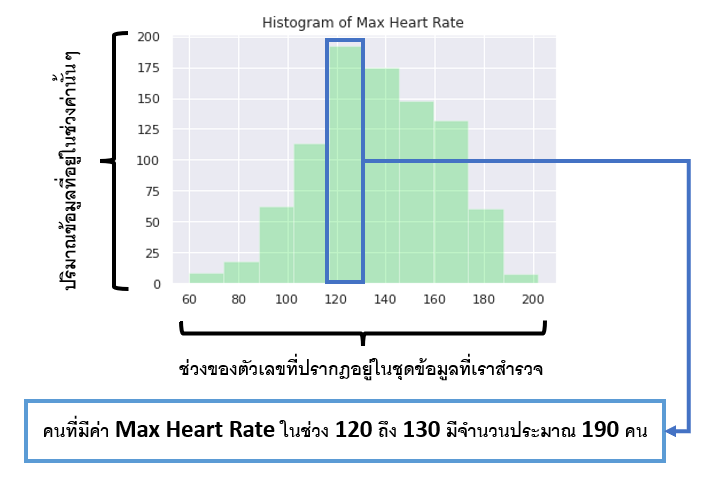

#### 5.1 Histogram แบบธรรมดา

In [ ]:
###########
#Plot กราฟ#
###########
#ทำการ plot Histogram โดยที่ x เป็นที่ใส่เข้าไปเป็นค่า df['MaxHR']
# + color สีของ Histogram
# + alpha ความจางของสี
plt.hist(df['MaxHR'], color = '#04D721', alpha = 0.25)

###################
#กำหนดค่าต่างๆในกราฟ#
###################
plt.title('Histogram of Max Heart Rate') #เพิ่มหัวข้อของกราฟ
plt.show()

สามารถนำการกระจายของข้อมูลระหว่างสองกลุ่ม ระหว่างผู้ที่เป็นโรคหัวใจและไม่ได้เป็นโรคหัวใจ มาเปรียบเทียบเพื่อหาและคาดคะเนความแตกต่างระหว่างสองกลุ่ม

> <b>ตามตัวอย่างด้านล่าง คนที่ไม่มีโรคหัวใจมีแนวโน้มที่จะมีค่า Max Heart Rate มากกว่าคนที่เป็นโรคหัวใจ</b>

In [ ]:
################################
#เตรียมข้อมูลปริมาณประชากรในแต่ละกลุ่ม#
################################
normal_ = df[df['HeartDisease'] == 0] #แยกข้อมูล DataFrame ส่วนที่ HeartDisease มีค่าเป็น 0
having_hd  = df[df['HeartDisease'] == 1] #แยกข้อมูล DataFrame ส่วนที่ HeartDisease มีค่าเป็น 1

###########
#Plot กราฟ#
###########

#Histogram สีเขียว - Greeen Histogram
plt.hist(normal_['MaxHR'], color = '#04D721', alpha = 0.25, label = 'Normal population')

#Histogram สีชมพู - Pink Histogram
plt.hist(having_hd['MaxHR'], color = '#F183F0', alpha = 0.25, label = 'Having Heart Disease')

###################
#กำหนดค่าต่างๆในกราฟ#
###################
plt.title('Histogram of Max Heart Rate in Normal and \nHaving Heart Disease Populations') #เพิ่มหัวข้อของกราฟ
plt.legend() #แสดง label ของแต่ละข้อมูลที่ plot ลงไป
plt.show()

#### 5.2 Histogram แบบสะสมรวม (Cummulative)

วิธีการอ่าน Histogram แบบสะสมรวม

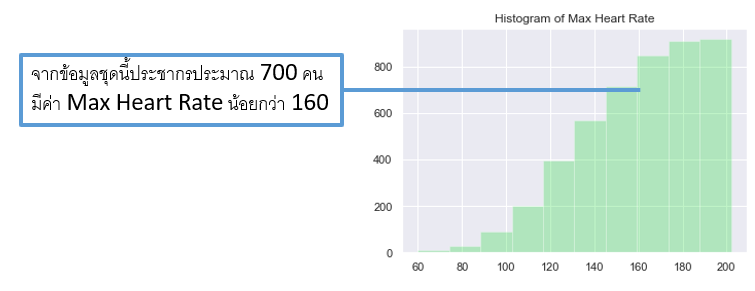

In [ ]:
###########
#Plot กราฟ#
###########

#ทำการ plot Histogram โดยที่ x เป็นที่ใส่เข้าไปเป็นค่า df['MaxHR']
# + color สีของ Histogram
# + alpha ความจางของสี
# + cumulative เป็นการปรับให้ Histogram เป็นรูปแบบ cumulative
plt.hist(df['MaxHR'], color = '#04D721', alpha = 0.25, cumulative = True)

###################
#กำหนดค่าต่างๆในกราฟ#
###################
plt.title('Histogram of Max Heart Rate') #เพิ่มหัวข้อของกราฟ
plt.show()

### 6. Box Plot<a id='box'></a>

การสร้าง Box Plot เราจะใช้คำสั่ง plt.boxplot(x)
> โดย x เป็นค่าจาก List ที่เราต้องการสำรวจ

<b>หลักการในการใช้: เพื่อสำรวจการกระจายตัวของข้อมูลในหนึ่ง Attribute เท่านั้นซึ่งจะสามารถแสดงข้อมูลได้คล้ายๆ Histogram แต่มีจุดแข็งที่สามารถ visualize ตัวของ outliers ออกมาให้เห็นโดยชัดเจน</b>

วิธีการอ่าน Box Plot

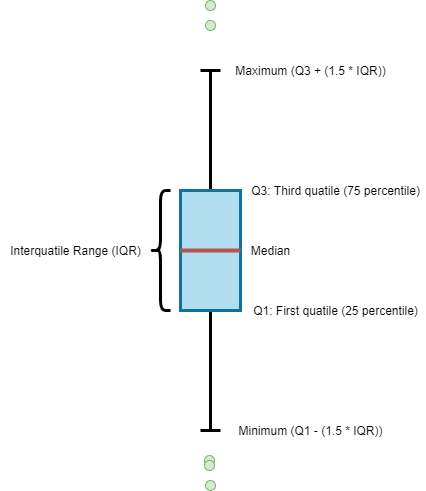

In [ ]:
###########
#Plot กราฟ#
###########
plt.boxplot(df['Age'])

###################
#กำหนดค่าต่างๆในกราฟ#
###################
plt.title('Age Box Plot') #เพิ่มหัวข้อของกราฟ
plt.xticks([1], ['Age'])  #ทำการแทนค่าเลข 1 ในแกน x ด้วยคำว่า Age
plt.ylabel('Values')      #เพิ่มคำแสดงความหมายของแกน y
plt.show()

สามารถสร้าง Box Plot หลายอันออกมาในกราฟเดียว
> โดยสร้าง List ของข้อมูลที่ต้องการทำ Box Plot แล้วนำเข้าไปใส่แทนค่า x ใน plt.boxplot(x) ได้เลย

In [ ]:
###########
#Plot กราฟ#
###########
#แทนค่า x ด้วย List ของข้อมูลที่ต้องการทำ Box Plot
plt.boxplot([ df['Age'], df['MaxHR'], df['RestingBP'] ])

###################
#กำหนดค่าต่างๆในกราฟ#
###################

#ทำการแทนค่าในแกน x
#แทนค่าเลข 1 ด้วยคำว่า Age
#แทนค่าเลข 2 ด้วยคำว่า Max Heart Rate
#แทนค่าเลข 3 ด้วยคำว่า Resting Blood Pressure
plt.xticks([1, 2, 3], ['Age', 'Max Heart Rate', 'Resting Blood Pressure'])
plt.title('Box Plot of Age, Max Heart Rate and Resting Blood Pressure') #เพิ่มหัวข้อของกราฟ
plt.ylabel('Values') #เพิ่มคำแสดงความหมายของแกน y
plt.show()

Box Plot สามารถใช้ในการเปรียบเทียบการกระจายระหว่างกลุ่มได้เหมือนกับ Histogram ได้

In [ ]:
################################
#เตรียมข้อมูลปริมาณประชากรในแต่ละกลุ่ม#
################################
normal_ = df[df['HeartDisease'] == 0] #แยกข้อมูล DataFrame ส่วนที่ HeartDisease มีค่าเป็น 0
having_hd  = df[df['HeartDisease'] == 1] #แยกข้อมูล DataFrame ส่วนที่ HeartDisease มีค่าเป็น 1

###########
#Plot กราฟ#
###########
#แทนค่า x ด้วย List ของข้อมูลที่ต้องการทำ Box Plot
plt.boxplot([ normal_['MaxHR'], having_hd['MaxHR'] ])

###################
#กำหนดค่าต่างๆในกราฟ#
###################
plt.xticks([1, 2], ['Normal', 'Having Heart Disease']) #ทำการแทนค่าในแกน x
plt.title('Box Plot of Max Heart Rate in Normal and Having Heart Disease Populations') #เพิ่มหัวข้อของกราฟ
plt.ylabel('Max Heart Rate') #เพิ่มคำแสดงความหมายของแกน y
plt.show()

### 7. Subplot<a id='subplot'></a>

การทำ Subplot จะเป็นการสร้างกราฟย่อยๆหลายๆอันภายในหนึ่งรูปหรือ Figure

โครงสร้างของการทำ Subplot เป็นดังนี้
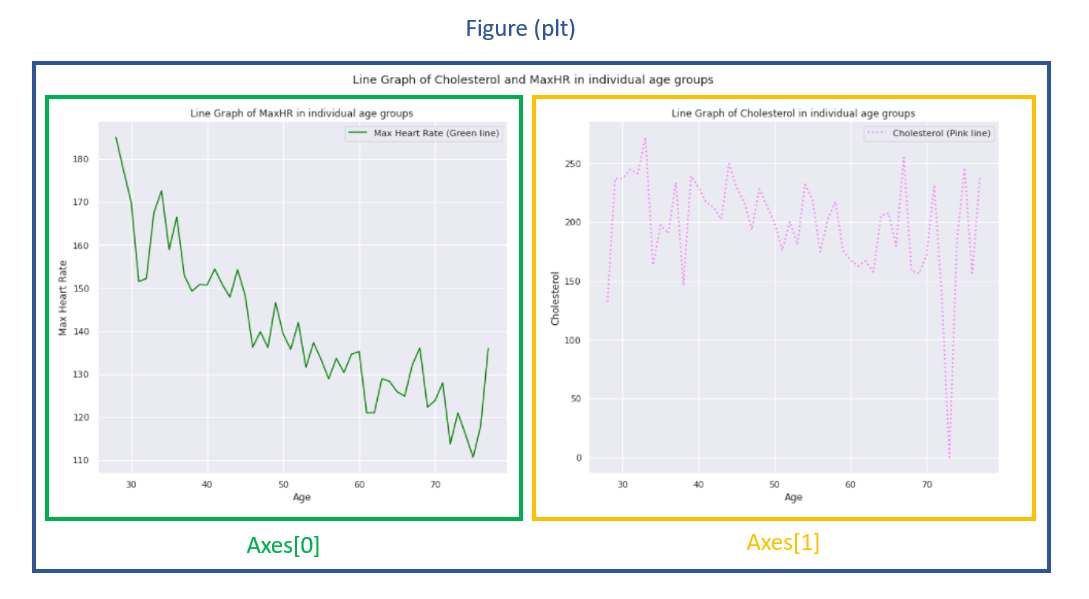

<b>ตามโครงสร้างของการทำ Subplot นั้น การเขียนโค้ดเพื่อเข้าไปจัดการหน้าตาของแต่ละกราฟย่อยๆนั้นเราต้องใช้สิ่งที่เรียกกันว่า axes แทน</b>
> เนื่องจาก plt จะใช้เมื่อต้องการ plot กราฟต่างๆเพียง 1 กราฟต่อหนึ่งรูป หรือความหมายหนึ่งคือ plt จะเป็นการจัดการ Figure โดยภาพรวมโดยจะสามารถจัดการและกำหนดค่าต่างๆได้แค่กราฟเดียวเท่านั้น

<b>NOTE: อย่างไรก็ตามการใช้คำสั่งต่างๆใน axes นั้นจะแตกต่างจาก plt ในส่วนการกำหนดค่าต่างๆภายในกราฟย่อยๆ</b>

ย้อนกลับไปดูตัวอย่างจาก Line Graph ที่เรา plot ซ้อนทับกัน

In [ ]:
###########
#Plot กราฟ#
###########

celsius_min = [19.6, 24.1, 26.7, 28.3, 
               27.5, 30.5, 32.8]
celsius_max = [24.8, 28.9, 31.3, 33.0, 
               34.9, 35.6, 38.4]


#เส้นสีเขียว - Green line
plt.plot(days, celsius_min, alpha = 0.5, color = 'green',
         label = 'celsius_min (Green line)')

#เส้นสีชมพู - Pink line
plt.plot(days, celsius_max, linewidth= 2, color = '#F90766', ls = ':',
         label = 'celsius_max (Pink line)')

###################
#กำหนดค่าต่างๆในกราฟ#
###################
plt.title('Line Graph of Degrees Celsius in Week') #เพิ่มหัวข้อของกราฟ
plt.xlabel('Day', size = 20) #นอกจากจะสามารถเติมความหมายของแกน x ได้ ยังสามารถใช้ size ในการกำหนดขนาดของตัวอักษรไดอีกด้วย
plt.ylabel('Degree Celsius') #เพิ่มคำแสดงความหมายของแกน y
plt.grid() #วาดเส้นตารางลงไปใน graph
plt.legend() #แสดง label ของแต่ละข้อมูลที่ plot ลงไป
plt.show()

เริ่มทำการแบ่ง Line graph แต่ละอันออกมาเป็นของตนเองโดยใช้ Subplot

การสร้าง Subplot เราจะใช้คำสั่ง plt.subplots(x ,y)

> โดย x เป็นค่าจำนวนแถวในแนวนอน (row) ของกราฟย่อยๆที่เราจะสร้าง และ y เป็นจำนวนแถวในแนวตั้ง (columns)

<b>ตัวอย่าง: ถ้าเรามีแถวในแนวนอนเท่ากับ 2 และ จำนวนแถวในแนวตั้งเท่ากับ 3 เราจะมีกราฟย่อยๆเป็นจำนวน 6 กราฟ</b>

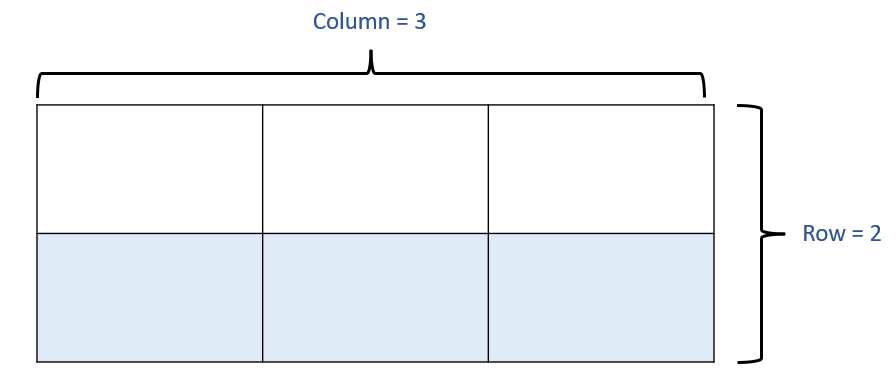

In [ ]:
#####################################################################
#ทำการสร้าง Subplot ออกมาโดยมีค่า axes ที่เราสามารถนำไปสร้างกราฟย่่อยๆขึ้นมาได้#
####################################################################
#ทำการสร้าง Subplot
# + figsize(x,y) เป็นการกำหนดขนาดของ Figure โดย x เป็นความยาว และ y เป็นความกว้าง
# + sharey = True จะให้กราฟที่อยู่ในแนวนอนเดียวใช้ค่า Y ร่วมกัน
fig, axes = plt.subplots(1, 2, figsize=(20,8), sharey = True)

######################################
#Plot กราฟ และ กำหนดค่าต่างๆในกราฟย่อยๆ#
#####################################

days = np.arange(1, 8)
celsius_min = [19.6, 24.1, 26.7, 28.3, 
               27.5, 30.5, 32.8]
celsius_max = [24.8, 28.9, 31.3, 33.0, 
               34.9, 35.6, 38.4]

#กราฟด้านซ้าย Graph for Min Degree Celsius
axes[0].plot(days, celsius_min, alpha = 1, color = 'green', label = 'Min Degree Celsius (Green line)')
axes[0].set_title('Line Graph of Min Degree Celsius in week')#เพิ่มหัวข้อของกราฟแรก
axes[0].set_xlabel('Day') #เพิ่มคำแสดงความหมายของแกน x ในกราฟแรก
axes[0].set_ylabel('Min Degree Celsius') #เพิ่มคำแสดงความหมายของแกน y ในกราฟแรก
axes[0].legend() #แสดง label ของแต่ละข้อมูลที่ plot ลงไปในกราฟแรก

#กราฟด้านขวา Graph for Max Degree Celsius
axes[1].plot(days, celsius_max, linewidth= 2, color = '#F183F0', ls = ':', label = 'Max Degree Celsius (Pink line)')
axes[1].set_title('Line Graph of Max Degree Celsius in week') #เพิ่มหัวข้อของกราฟที่สอง
axes[1].set_xlabel('Day') #เพิ่มคำแสดงความหมายของแกน x ในกราฟที่สอง
axes[1].set_ylabel('Max Degree Celsius') #เพิ่มคำแสดงความหมายของแกน y ในกราฟที่สอง
axes[1].legend() #แสดง label ของแต่ละข้อมูลที่ plot ลงไปในกราฟที่สอง

###########################
#กำหนดค่าต่างๆใน Figure ใหญ่#
##########################
plt.suptitle('Line Graph of Cholesterol and MaxHR in individual age groups') #เพิ่มหัวข้อของกราฟหลัก
plt.show()

In [ ]:
#####################################################################
#ทำการสร้าง Subplot ออกมาโดยมีค่า axes ที่เราสามารถนำไปสร้างกราฟย่่อยๆขึ้นมาได้#
####################################################################
#ทำการสร้าง Subplot
# + figsize(x,y) เป็นการกำหนดขนาดของ Figure โดย x เป็นความยาว และ y เป็นความกว้าง
# + sharey = True จะให้กราฟที่อยู่ในแนวนอนเดียวใช้ค่า Y ร่วมกัน
fig, axes = plt.subplots(2, 1, figsize=(20,8), sharey = True)

######################################
#Plot กราฟ และ กำหนดค่าต่างๆในกราฟย่อยๆ#
#####################################

days = np.arange(1, 8)
celsius_min = [19.6, 24.1, 26.7, 28.3, 
               27.5, 30.5, 32.8]
celsius_max = [24.8, 28.9, 31.3, 33.0, 
               34.9, 35.6, 38.4]

#กราฟด้านซ้าย Graph for Min Degree Celsius
axes[0].plot(days, celsius_min, alpha = 1, color = 'green', label = 'Min Degree Celsius (Green line)')
axes[0].set_title('Line Graph of Min Degree Celsius in week')#เพิ่มหัวข้อของกราฟแรก
axes[0].set_xlabel('Day') #เพิ่มคำแสดงความหมายของแกน x ในกราฟแรก
axes[0].set_ylabel('Min Degree Celsius') #เพิ่มคำแสดงความหมายของแกน y ในกราฟแรก
axes[0].legend() #แสดง label ของแต่ละข้อมูลที่ plot ลงไปในกราฟแรก

#กราฟด้านขวา Graph for Max Degree Celsius
axes[1].plot(days, celsius_max, linewidth= 2, color = '#F183F0', ls = ':', label = 'Max Degree Celsius (Pink line)')
axes[1].set_title('Line Graph of Max Degree Celsius in week') #เพิ่มหัวข้อของกราฟที่สอง
axes[1].set_xlabel('Day') #เพิ่มคำแสดงความหมายของแกน x ในกราฟที่สอง
axes[1].set_ylabel('Max Degree Celsius') #เพิ่มคำแสดงความหมายของแกน y ในกราฟที่สอง
axes[1].legend() #แสดง label ของแต่ละข้อมูลที่ plot ลงไปในกราฟที่สอง

###########################
#กำหนดค่าต่างๆใน Figure ใหญ่#
##########################
plt.suptitle('Line Graph of Cholesterol and MaxHR in individual age groups') #เพิ่มหัวข้อของกราฟหลัก
plt.show()

กรณีที่จะระบุ axes ใน Subplot ที่มีหลายตัวอยู่ในแนวเดียวกันจะต้องใช้ index ในการระบุ เช่น กราฟแรกจะนั้นอยู่ในตำแหน่ง row = 0 และ col =0 ดังนั้นเวลากรอก index จะเป็น axes[0,0]

In [ ]:
#####################################################################
#ทำการสร้าง Subplot ออกมาโดยมีค่า axes ที่เราสามารถนำไปสร้างกราฟย่่อยๆขึ้นมาได้#
####################################################################
#ทำการสร้าง Subplot
# + figsize(x,y) เป็นการกำหนดขนาดของ Figure โดย x เป็นความยาว และ y เป็นความกว้าง
# + sharey = True จะให้กราฟที่อยู่ในแนวนอนเดียวใช้ค่า Y ร่วมกัน
fig, axes = plt.subplots(2, 2, figsize=(20,8))

######################################
#Plot กราฟ และ กำหนดค่าต่างๆในกราฟย่อยๆ#
#####################################

#ซ้ายบน
axes[0, 0].scatter(df['Age'],df['MaxHR'], s = 75, color = '#2E96C6', alpha = 0.5)
axes[0, 0].set_title('Scatter plot of Age and Max Heart Rate') #เพิ่มหัวข้อของกราฟ
axes[0, 0].set_xlabel('Age') #เพิ่มคำแสดงความหมายของแกน x
axes[0, 0].set_ylabel('Max Heart Rate') #เพิ่มคำแสดงความหมายของแกน y



#ขวาบน
labels = ['Normal' , 'Heart Disease'] #ประเภทของสิ่งของที่เราจะทำการสำรวจ
values = [len(df[df['HeartDisease'] == 0]) ,len(df[df['HeartDisease'] == 1])] #ปริมาณประชากรในแต่ละ labels

axes[0, 1].bar(labels,values, width = 0.75, color = ['#04D721', '#F183F0'], alpha = 0.25, label=labels)
axes[0, 1].set_title('Numbers of Normal and Having Heart Disease populations') #เพิ่มหัวข้อของกราฟ
axes[0, 1].set_xlabel('Labels') #เพิ่มคำแสดงความหมายของแกน x
axes[0, 1].set_ylabel('Values') #เพิ่มคำแสดงความหมายของแกน y
axes[0,1].legend()#แสดง label ของแต่ละข้อมูลที่ plot ลงไปในกราฟ



#ซ้ายล่าง
normal_ = df[df['HeartDisease'] == 0] #แยกข้อมูล DataFrame ส่วนที่ HeartDisease มีค่าเป็น 0
having_hd  = df[df['HeartDisease'] == 1] #แยกข้อมูล DataFrame ส่วนที่ HeartDisease มีค่าเป็น 1

#Histogram สีเขียว - Greeen Histogram
axes[1,0].hist(normal_['MaxHR'], color = '#04D721', alpha = 0.25, label = 'Normal population')

#Histogram สีชมพู - Pink Histogram
axes[1,0].hist(having_hd['MaxHR'], color = '#F183F0', alpha = 0.25, label = 'Having Heart Disease')
axes[1,0].set_title('Histogram of Max Heart Rate in Normal and \nHaving Heart Disease Populations') #เพิ่มหัวข้อของกราฟ
axes[1,0].legend() #แสดง label ของแต่ละข้อมูลที่ plot ลงไป



#ขวาล่าง
axes[1,1].boxplot([df['Age'], df['MaxHR'], df['RestingBP']], labels=['Age', 'Max Heart Rate', 'Resting Blood Pressure'])

#plt.xticks([1, 2, 3], ['Age', 'Max Heart Rate', 'Resting Blood Pressure'])
axes[1,1].set_title('Box Plot of Age, Max Heart Rate and Resting Blood Pressure') #เพิ่มหัวข้อของกราฟ
axes[1,1].set_ylabel('Values') #เพิ่มคำแสดงความหมายของแกน y


###########################
#กำหนดค่าต่างๆใน Figure ใหญ่#
##########################
fig.suptitle('Including Analytical Graphs of Heart Failure', size=20) #เพิ่มหัวข้อของกราฟหลัก
plt.show()